In [2]:
# Construct a portfolio with any 10 stocks of your choice (use daily adjusted closing prices) and computes the max Sharpe ratio and optimal weights. 
# You will also need to plot the respective efficient frontier.
# As part of  your stock selection, you will need to look at  the pairwise correlations to gain insights about  your selection, and also look at their individual past performance.
# As part of your presentation, you will need to tell the story of how you decided on the stocks that you included, 
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# inflation rate from 2017 to 2022=>15.09%, yield of US treasury bond=>2.78%, risk free rate=>12.31%
# all in USD, as of 8/1/2022
# Apple AAPL  5yrs ago 162.36, 161.51
# Alphabet GOOG 5yrs ago  116, 114.86
# AMD 5 years ago 13.12, 99.29 
# Amazon AMZN, Inc 5 years ago, 137.23, 135.39
# Tencent TCEHY 5 years ago 37.92, 37.32
# Samsung SMSN.IL 5 years ago, 47.21, 47.15
# Kering KER.PA 5 years ago 55.5, 56.72
# LVMH MC.PA 5 years ago 138.28, 140.77
# Tesla TSLA 71.38, 901.76
# Nike NKE 59.76, 111.17
all_data = {ticker: web.get_data_yahoo(ticker)
           for ticker in ['AAPL', 'TSLA', 'GOOG', 'AMD', 'MC.PA', 'KER.PA','NKE','TCEHY','SMSN.IL','AMZN']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items() })
price.describe()


,AAPL,TSLA,GOOG,AMD,MC.PA,KER.PA,NKE,TCEHY,SMSN.IL,AMZN
count,1258.000000,1258.000000,1258.000000,1258.000000,1281.000000,1281.000000,1258.000000,1258.000000,1263.000000,1258.000000
mean,88.082744,344.958510,81.733603,56.000111,411.610860,488.241020,101.030906,54.224131,1187.208358,115.085707
std,46.351583,349.198025,32.296453,38.707115,160.248960,117.947130,33.549389,13.344331,320.175381,39.740498
min,34.414234,35.793999,45.333000,9.530000,196.223862,251.742355,48.505291,31.738342,760.280823,46.930000
25%,45.390792,62.336499,55.998999,20.862500,275.108704,411.510315,74.810083,43.854307,932.608459,85.251122
50%,68.839420,104.886002,66.775249,47.495001,364.838104,481.636780,91.012787,50.137655,1060.663818,98.735001
75%,131.562687,678.655014,112.029247,86.562502,572.900024,558.099670,131.161865,61.556099,1466.858948,158.093746
max,181.511703,1229.910034,150.709000,161.910004,749.380798,774.934937,176.351212,98.369888,2017.505005,186.570496


In [8]:
returns = price.pct_change()
volume = pd.DataFrame({ticker: data['Volume']
                     for ticker, data in all_data.items() })
returns.corrwith(volume)



AAPL      -0.082307
TSLA       0.115412
GOOG      -0.081707
AMD        0.087174
MC.PA     -0.073086
KER.PA    -0.068067
NKE        0.057497
TCEHY     -0.091297
SMSN.IL   -0.050361
AMZN      -0.027013
dtype: float64

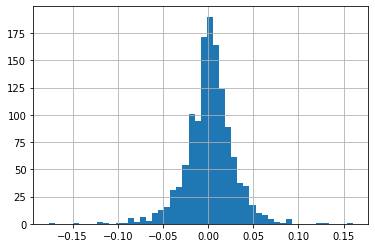

In [4]:
# calculating sharpe ratio
tickers = ['AAPL', 'TSLA', 'GOOG', 'AMD', 'MC.PA', 'KER.PA','NKE','TCEHY','SMSN.IL','AMZN']
start = dt.datetime(2017, 8, 2)
data = web.get_data_yahoo(tickers, start)
data = data['Adj Close']
portfolio = [0.1, 0.1, 0.1, 0,1, 0.1, 0.1, 0.1, 0.1, 0.1]
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)
# calculating optimal weight(more data centered around 0.0)
sharpe_ratio = log_return.mean()/log_return.std()
asr = sharpe_ratio*252**.5


In [5]:
# sharpe ratio/average return of investment divided by standard deviation
sharpe_ratio = log_return.mean()/log_return.std()
# annualized sharpe ratio
asr = sharpe_ratio*252**.5
print(sharpe_ratio)
print(asr)

0.05804108375777908
0.9213736406865224


Text(0, 0.5, 'Expected Return')

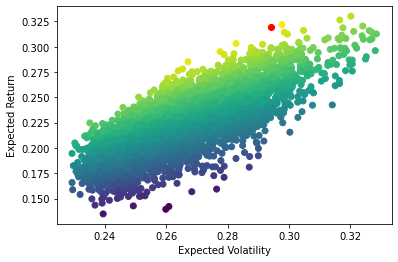

In [6]:
# Monte Carlo Simulation to calculate max sharpe ratio
log_returns = np.log(data/data.shift())
n = 5000
 
weights = np.zeros((n, 10))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)
 
for i in range(n):
    weight = np.random.random(10)
    weight /= weight.sum()
    weights[i] = weight
     
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]
# graph of efficient frontier
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
